In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]

## Questions
1. How to compute zero crossing in 2d array
2. What threshold to use in sobel and in general


# Convolution

## 1D Convolution

In [3]:
# Convolves a 1D array with a kernel
def conv1D(inSignal:np.ndarray,kernel1:np.ndarray)->np.ndarray:
    if(kernel1.shape[0] % 2 == 0):
        pad_size = int((kernel1.shape[0])/2)
        padded_signal = np.pad(inSignal, pad_size, 'constant', constant_values=0)
        new_signal = np.array([])
        # Apply kernel to each pixel
        for i in range(0, padded_signal.shape[0]-pad_size-1):
            sub_signal = padded_signal[i:i+pad_size+1]
            prod = sub_signal*kernel1
            sub_signal_sum = np.sum(prod)
            new_signal = np.append(new_signal, sub_signal_sum)
    else:
        # Padding array with zeros so resulting array is same length as original
        pad_size = int((kernel1.shape[0]-1)/2)
        padded_signal = np.pad(inSignal, pad_size, 'constant', constant_values=0)
        new_signal = np.array([])
        # Apply kernel to each pixel
        for i in range(pad_size, padded_signal.shape[0]-pad_size):
            sub_signal = padded_signal[i-pad_size:i+pad_size+1]
            prod = sub_signal*kernel1
            sub_signal_sum = np.sum(prod)
            new_signal = np.append(new_signal, sub_signal_sum)
    return new_signal

In [4]:
conv1D(np.array([1,1]),np.array([1,1]))

array([1., 2.])

In [5]:
np.convolve(np.array([1,1]),np.array([1,1]),'same')

array([1, 2])

## 2D Convolution

In [6]:
def conv2D(inImage:np.ndarray,kernel2:np.ndarray)->np.ndarray:
    pad_size = int((kernel2.shape[0]-1)/2)
#     padded_image = np.pad(inImage, ((pad_size,pad_size),(pad_size,pad_size)), 'constant', constant_values=0)
    padded_image = np.pad(inImage, ((pad_size,pad_size),(pad_size,pad_size)), 'reflect')
    new_image = np.zeros(padded_image.shape)
    for i in range(pad_size, padded_image.shape[0]-pad_size):
        for j in range(pad_size, padded_image.shape[1]-pad_size):
            sub_image = padded_image[i-pad_size:i+pad_size+1,j-pad_size:j+pad_size+1]
            prod = sub_image*kernel2
            sub_image_sum = np.sum(prod)
            new_image[i,j] = sub_image_sum
    return new_image[pad_size:-pad_size,pad_size:-pad_size]

In [7]:
def mean_ker(size):
    return np.full((size,size),1)/(size*size)

(400, 400)

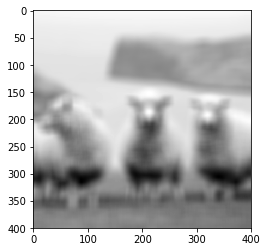

In [8]:
img = cv2.imread("sheep.png",0)
ker = mean_ker(19)
ker = ker/np.sum(ker)
res = conv2D(img,ker)
plt.imshow(res,'gray')
res.shape

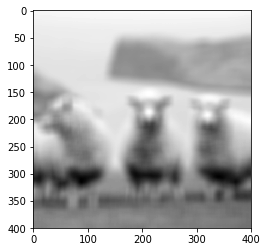

In [9]:
res2 = cv2.filter2D(img,-1,ker)
plt.imshow(res2,'gray')

0.49861495844879755

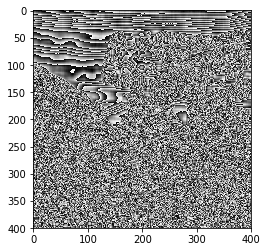

In [10]:
plt.imshow(res2-res,'gray')
np.max(res2-res) # max pixel value diff between my result and opencv's

# Image derivatives & blurring

## Derivatives

In [128]:
def convDerivative(inImage:np.ndarray) -> np.ndarray:
    ker = np.array([1,0,-1])
    h,w = inImage.shape[:2]
    der_x = conv2D(inImage,ker)
    der_y = conv2D(inImage, np.reshape(ker,(3,1)))
    mag = np.sqrt(der_x**2 + der_y**2)
    return mag

def gradDirection(inImage:np.ndarray) -> np.ndarray:
    ker = np.array([1,0,-1])
    h,w = inImage.shape[:2]
    der_x = conv2D(inImage,ker)
    der_y = conv2D(inImage, np.reshape(ker,(3,1)))
    dir = np.arctan2(der_x,der_y)
    return dir

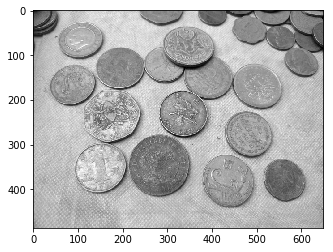

In [14]:
img = cv2.imread('coins.jpg',0)
plt.imshow(img,'gray')

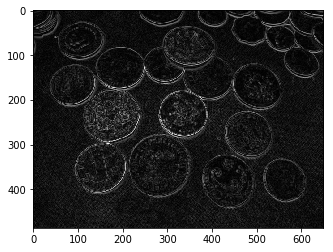

In [15]:
img = cv2.imread('coins.jpg',0)
plt.imshow(convDerivative(img),'gray')

In [141]:
img = cv2.imread('coins.jpg',0)
grad_dir = gradDirection(img)

array([[   0.        ,  -90.        ,   90.        , ...,  -90.        ,
           0.        ,    0.        ],
       [ 180.        , -132.51044708,  165.96375653, ..., -178.53119929,
         177.31022968,  180.        ],
       [ 180.        , -162.64597536,  180.        , ..., -178.47923034,
         178.92917555,  180.        ],
       ...,
       [   0.        ,   46.36392753,   56.97613244, ..., -176.9872125 ,
         165.06858282,  180.        ],
       [   0.        ,   50.71059314,  106.92751306, ...,  -30.65066796,
         -90.        ,  180.        ],
       [   0.        ,   90.        ,   90.        , ...,  -90.        ,
         -90.        ,    0.        ]])

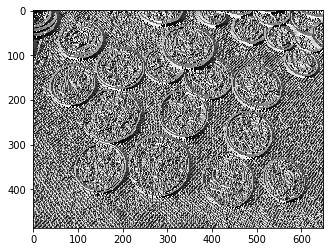

In [146]:
plt.imshow(grad_dir,'gray')
np.degrees(grad_dir)

## Blurring

0.9999999999999999

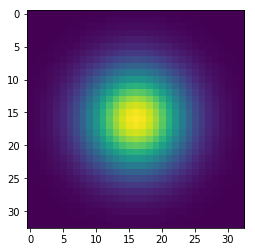

In [16]:
def gauss_row(size):
    arr = np.array([1,1])
    ker = np.array([1,1])
    for i in range(size-2):
        arr = np.convolve(arr,ker)
    return arr/np.sum(arr)

def G(x,y,sigma):
    return (1/2*np.pi*sigma*sigma)*np.e**(-(x**2+y**2)/2*sigma**2)

def gauss(size):
    sigma = 1/(0.3*((size-1)*0.5 - 1) + 0.8)
    mat = np.zeros((size,size))
    center = np.ceil(size/2)-1
    for i in range(size):
        for j in range(size):
            mat[i,j] = G(np.abs(i-center),np.abs(j-center),sigma)
    return mat/np.sum(mat)

plt.imshow(gauss(33))
np.sum(gauss(51))

1.0

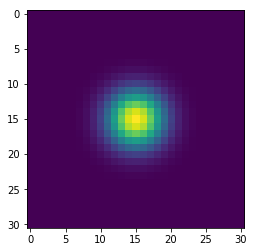

In [17]:
ker_size = 31
mat = np.dot(np.reshape(gauss_row(ker_size),(ker_size,1)),np.reshape(gauss_row(ker_size),(1,ker_size)))
plt.imshow(mat)
np.sum(mat)

In [58]:
mat = np.dot(np.reshape(np.array([1,0,-1]),(3,1)),np.reshape(np.array([1,2,1]),(1,3)))
mat

array([[ 1,  2,  1],
       [ 0,  0,  0],
       [-1, -2, -1]])

In [59]:
mat = np.dot(np.reshape(np.array([1,2,1]),(3,1)),np.reshape(np.array([1,0,-1]),(1,3)))
mat

array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])

In [18]:
def blurImage1(inImage:np.ndarray,kernelSize:np.ndarray)->np.ndarray:
    new_image = np.zeros(inImage.shape)
    channels = 1
    if len(inImage.shape) == 3:
        channels = inImage.shape[2]
    ker = []
    for i in range(kernelSize.shape[0]):
        ker.append(gauss(kernelSize[i]))
    ker = np.array(ker)
    if(channels > 1):
        for i in range(inImage.shape[2]):
            new_image[:,:,i] = conv2D(new_image[:,:,i],ker[i])
    else:
         new_image = conv2D(inImage,ker[0])
    return new_image

def blurImage2(inImage:np.ndarray,kernelSize:np.ndarray)->np.ndarray:
    channels = 1
    if len(inImage.shape) == 3:
        channels = inImage.shape[2]
    ker = []
    for i in range(kernelSize.shape[0]):
        ker.append(cv2.getGaussianKernel(kernelSize[i],-1))
    ker = np.array(ker)
    if(channels > 1):
        for i in range(inImage.shape[2]):
            inImage[:,:,i] = cv2.filter2D(inImage[:,:,i],-1,ker[i])
        inImage = np.transpose(inImage)
        for i in range(inImage.shape[2]):
            inImage[:,:,i] = cv2.filter2D(inImage[:,:,i],-1,ker[i])
    else:
        inImage = cv2.filter2D(inImage,-1,ker[0])
        inImage = np.transpose(inImage)
        inImage = cv2.filter2D(inImage,-1,ker[0])
    return np.transpose(inImage)

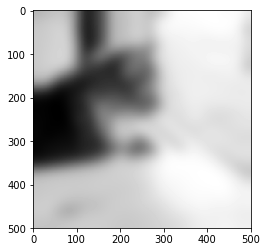

In [19]:
img = cv2.imread("cat.jpg",0)
res1 = blurImage1(img,np.array([101]))
plt.imshow(res1,'gray')

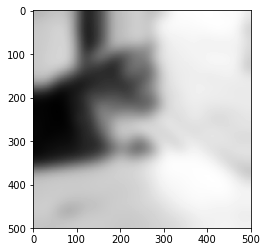

In [20]:
img = cv2.imread("cat.jpg",0)
res2 = blurImage2(img,np.array([101]))
plt.imshow(res2,'gray')

0.6827559369997402

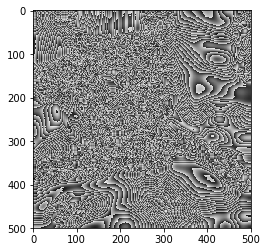

In [21]:
plt.imshow(res2-res1,'gray')
np.max(res2-res1)

## Edge detection

In [104]:
def edgeDetectionSobel(I:np.ndarray)->(np.ndarray,np.ndarray):
#     I = blurImage1(I,np.array([3]))
    ker_grad = np.array([1,0,-1])
    ker_gauss = np.array([1,2,1])
    h,w = I.shape[:2]
    der_x = conv2D(I,ker_gauss)
    der_x = conv2D(der_x,ker_grad)
    der_y = conv2D(I, np.reshape(ker_gauss,(3,1)))
    der_y = conv2D(der_y, np.reshape(ker_grad,(3,1)))
    mag = np.sqrt(der_x**2 + der_y**2)
    mag = cv2.normalize(mag,mag,0.0,1.0,cv2.NORM_MINMAX, cv2.CV_32FC1)
    sobelx = cv2.Sobel(I,cv2.CV_64F,1,0,ksize=5)
    sobely = cv2.Sobel(I,cv2.CV_64F,0,1,ksize=5)
    mag2 = np.sqrt(sobelx**2+sobely**2)
    mag2 = cv2.normalize(mag2,mag2,0.0,1.0,cv2.NORM_MINMAX, cv2.CV_32FC1)
#     for i in range(h):
#         for j in range(w):
#             if mag2[i,j] > 0.1:
#                 mag2[i,j] = 1
#             else:
#                 mag2[i,j] = 0
    return (mag,mag2)

In [126]:
img = cv2.imread('coins.jpg',0)
res = edgeDetectionSobel(img)
diff = np.abs(res[0]-res[1])

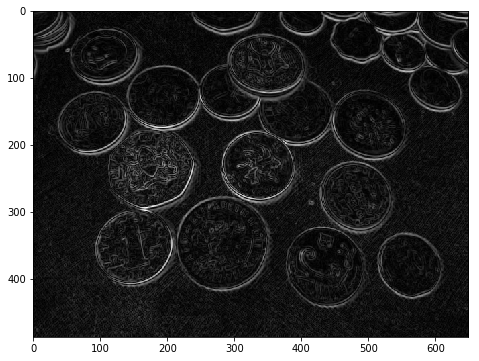

In [106]:
plt.figure(num=None, figsize=(8, 6))
plt.imshow(res[0],'gray')

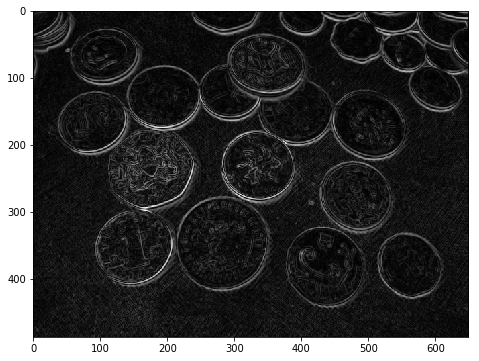

In [107]:
plt.figure(num=None, figsize=(8, 6))
plt.imshow(res[1],'gray')

max diff: 0.14018214
mean diff: 0.006269487


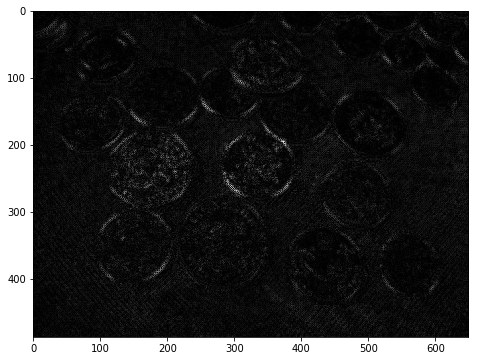

In [125]:
plt.figure(num=None, figsize=(8, 6))
plt.imshow(diff, 'gray')
print('max diff:',diff.max())
print('mean diff:',diff.mean())

In [26]:
def edgeDetectionZeroCrossingSimple(I:np.ndarray)->(np.ndarray,np.ndarray):
    ker = np.array([[0,1,0],[1,-4,1],[0,1,0]])
    h,w = I.shape[:2]
    res = conv2D(I, ker)
    res = cv2.normalize(res,res,0.0,1.0,cv2.NORM_MINMAX, cv2.CV_32FC1)
    threshold = np.absolute(res).mean() * 0.75
    for i in range(h):
        for j in range(w):
            if res[i,j] > threshold:
                res[i,j] = 1
            else:
                res[i,j] = 0
    return (res,res)

def edgeDetectionZeroCrossingLOG(I:np.ndarray)->(np.ndarray,np.ndarray):
    ker = np.array([[0,1,0],[1,-4,1],[0,1,0]])
    ker = conv2D(ker,gauss(9))
    h,w = I.shape[:2]
    LoG = conv2D(I, ker)
    thres = np.absolute(LoG).mean() * 0.75
#     res = cv2.normalize(res,res,0.0,1.0,cv2.NORM_MINMAX, cv2.CV_32FC1)
    output = sp.zeros(LoG.shape)
    for y in range(1, h - 1):
        for x in range(1, w - 1):
            patch = LoG[y-1:y+2, x-1:x+2]
            p = LoG[y, x]
            maxP = patch.max()
            minP = patch.min()
            if (p > 0):
                zeroCross = True if minP < 0 else False
            else:
                zeroCross = True if maxP > 0 else False
            if ((maxP - minP) > thres) and zeroCross:
                output[y, x] = 1

#     for i in range(h):
#         for j in range(w):
#             if res[i,j] > 0.7:
#                 res[i,j] = 1
#             else:
#                 res[i,j] = 0
    return (output,output)

In [27]:
img = cv2.imread('coins.jpg',0)
img = blurImage1(img,np.array([3]))
res = edgeDetectionZeroCrossing(img)[0]
plt.figure(num=None, figsize=(8, 6))
plt.imshow(res,'gray')

NameError: name 'edgeDetectionZeroCrossing' is not defined

In [ ]:
img = cv2.imread('coins.jpg',0)
img = blurImage1(img,np.array([3]))
res = edgeDetectionZeroCrossingSimple(img)[0]
plt.figure(num=None, figsize=(8, 6))
plt.imshow(res,'gray')

In [58]:
src = cv2.imread('coins.png',0)
src = blurImage1(src,np.array([3]))
LoG = cv2.Laplacian(src, cv2.CV_16S)
minLoG = cv2.morphologyEx(LoG, cv2.MORPH_ERODE, np.ones((3,3)))
maxLoG = cv2.morphologyEx(LoG, cv2.MORPH_DILATE, np.ones((3,3)))
zeroCross = np.logical_or(np.logical_and(minLoG < 0,  LoG > 0), np.logical_and(maxLoG > 0, LoG < 0))
plt.figure(num=None, figsize=(8, 6))
plt.imshow(zeroCross,'gray')

error: OpenCV(4.1.0) C:/projects/opencv-python/opencv/modules/imgproc/src/filter.simd.hpp:3109: error: (-215:Assertion failed) cn == CV_MAT_CN(dstType) && ddepth >= sdepth in function 'cv::opt_SSE4_1::getLinearFilter'


In [147]:
# This is also non-maxima suppression but without interpolation i.e. the pixel closest to the gradient direction is used as the estimate
def NonMaxSupWithoutInterpol(Gmag, Grad):
    NMS = np.zeros(Gmag.shape)
    for i in range(1, int(Gmag.shape[0]) - 1):
        for j in range(1, int(Gmag.shape[1]) - 1):
            if((Grad[i,j] >= -22.5 and Grad[i,j] <= 22.5) or (Grad[i,j] <= -157.5 and Grad[i,j] >= 157.5)):
                if((Gmag[i,j] > Gmag[i,j+1]) and (Gmag[i,j] > Gmag[i,j-1])):
                    NMS[i,j] = Gmag[i,j]
                else:
                    NMS[i,j] = 0
            if((Grad[i,j] >= 22.5 and Grad[i,j] <= 67.5) or (Grad[i,j] <= -112.5 and Grad[i,j] >= -157.5)):
                if((Gmag[i,j] > Gmag[i+1,j+1]) and (Gmag[i,j] > Gmag[i-1,j-1])):
                    NMS[i,j] = Gmag[i,j]
                else:
                    NMS[i,j] = 0
            if((Grad[i,j] >= 67.5 and Grad[i,j] <= 112.5) or (Grad[i,j] <= -67.5 and Grad[i,j] >= -112.5)):
                if((Gmag[i,j] > Gmag[i+1,j]) and (Gmag[i,j] > Gmag[i-1,j])):
                    NMS[i,j] = Gmag[i,j]
                else:
                    NMS[i,j] = 0
            if((Grad[i,j] >= 112.5 and Grad[i,j] <= 157.5) or (Grad[i,j] <= -22.5 and Grad[i,j] >= -67.5)):
                if((Gmag[i,j] > Gmag[i+1,j-1]) and (Gmag[i,j] > Gmag[i-1,j+1])):
                    NMS[i,j] = Gmag[i,j]
                else:
                    NMS[i,j] = 0

    return NMS

def edgeDetectionCanny(I:np.ndarray)->(np.ndarray,np.ndarray):
    # Apply Gaussian filter to smooth the image in order to remove the noise
    I = blurImage1(I,np.array([3]))
    # Find the intensity gradients of the image
    grad_mag = convDerivative(I)
    grad_dir = gradDirection(I)
    # Apply non-maximum suppression to get rid of spurious response to edge detection
    NMS = NonMaxSupWithoutInterpol(grad_mag, grad_dir)
    # Apply double threshold to determine potential edges
    
    # Track edge by hysteresis: Finalize the detection of edges by suppressing
    # all the other edges that are weak and not connected to strong edges.

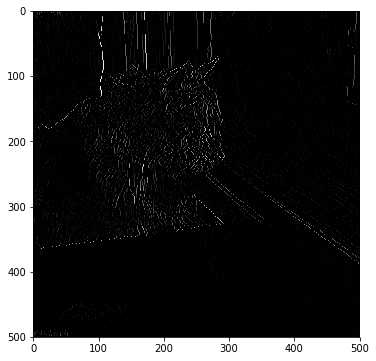

In [163]:
I = cv2.imread('cat.jpg',0)
# Apply Gaussian filter to smooth the image in order to remove the noise
I = blurImage1(I,np.array([5]))
# Find the intensity gradients of the image
grad_mag = convDerivative(I)
grad_dir = gradDirection(I)
# Apply non-maximum suppression to get rid of spurious response to edge detection
NMS = NonMaxSupWithoutInterpol(grad_mag, grad_dir)
plt.figure(num=None, figsize=(8, 6))
plt.imshow(NMS,'gray')

In [200]:
def DoThreshHyst(img):
    highThresholdRatio = 0.15
    lowThresholdRatio = 0.000001
    GSup = np.copy(img)
    GSup = cv2.normalize(GSup,GSup,0.0,255,cv2.NORM_MINMAX, cv2.CV_32FC1)
    h = int(GSup.shape[0])
    w = int(GSup.shape[1])
#     highThreshold = np.max(GSup) * highThresholdRatio
#     lowThreshold = highThreshold * lowThresholdRatio    
    highThreshold = 80
    lowThreshold = 0 
    x = 0.1
    oldx=0
    
    # The while loop is used so that the loop will keep executing till the number of strong edges do not change, i.e all weak edges connected to strong edges have been found
    while(oldx != x):
        oldx = x
        for i in range(1,h-1):
            for j in range(1,w-1):
                if(GSup[i,j] > highThreshold):
                    GSup[i,j] = 1
                elif(GSup[i,j] < lowThreshold):
                    GSup[i,j] = 0
                else:
                    if((GSup[i-1,j-1] > highThreshold) or 
                        (GSup[i-1,j] > highThreshold) or
                        (GSup[i-1,j+1] > highThreshold) or
                        (GSup[i,j-1] > highThreshold) or
                        (GSup[i,j+1] > highThreshold) or
                        (GSup[i+1,j-1] > highThreshold) or
                        (GSup[i+1,j] > highThreshold) or
                        (GSup[i+1,j+1] > highThreshold)):
                        GSup[i,j] = 1
        x = np.sum(GSup == 1)
    
    GSup = (GSup == 1) * GSup # This is done to remove/clean all the weak edges which are not connected to strong edges
    
    return GSup

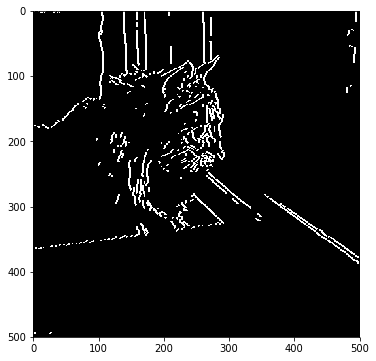

In [201]:
Final_Image = DoThreshHyst(NMS)
plt.figure(num=None, figsize=(8, 6))
plt.imshow(Final_Image, cmap = plt.get_cmap('gray'))

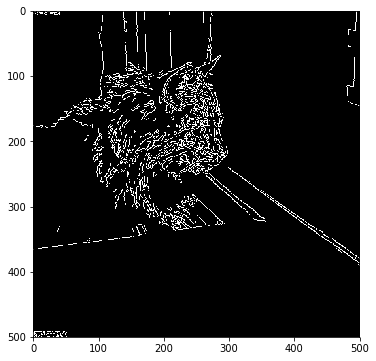

In [176]:
I = cv2.imread('cat.jpg',0)
# Final_Image = cv2.Canny(I,100,200)
Final_Image = cv2.Canny(I,100,200)

plt.figure(num=None, figsize=(8, 6))
plt.imshow(Final_Image, cmap = plt.get_cmap('gray'))